RESULTS:
ML Estimator:
Mean Square Error = 4.535611
Estimation Error = 0.615125

MAP Estimator:
Best gamma = 0.000100
Mean Square Error = 4.240496
Estimation Error = 0.119639


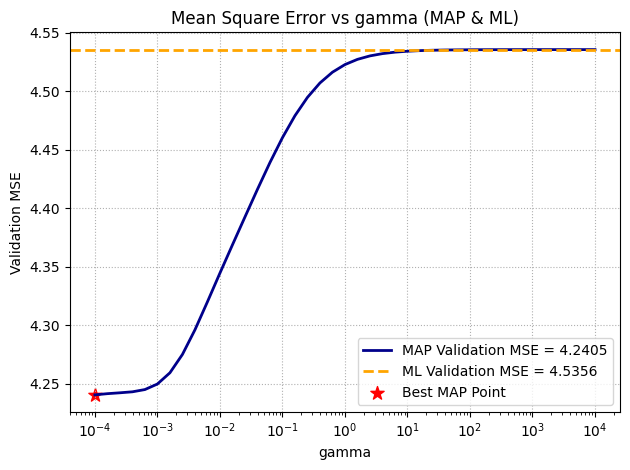

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from hw2q2 import hw2q2     # ensure hw2q2.py is in same directory


xTrain, yTrain, xVal, yVal = hw2q2()
Xtr, Xva = xTrain.T, xVal.T
ytr, yva = np.ravel(yTrain), np.ravel(yVal)


def phi(X):
    X = np.atleast_2d(X)
    x1, x2 = X[:, 0], X[:, 1]
    return np.column_stack([
        np.ones(len(X)),
        x1, x2,
        x1**2, x1*x2, x2**2,
        x1**3, x1**2*x2, x1*x2**2, x2**3
    ])

Phi_tr, Phi_va = phi(Xtr), phi(Xva)


def w_ml(Phi, y):
    return np.linalg.pinv(Phi) @ y

def w_map(Phi, y, lam):
    d = Phi.shape[1]
    A = Phi.T @ Phi + lam * np.eye(d)
    b = Phi.T @ y
    return np.linalg.solve(A, b)

def mse(y_true, y_pred):
    e = y_true - y_pred
    return float(np.mean(e**2))

w_ml_hat = w_ml(Phi_tr, ytr)
val_mse_ml = mse(yva, Phi_va @ w_ml_hat)
w_true = w_ml(np.vstack([Phi_tr, Phi_va]), np.concatenate([ytr, yva]))
est_err_ml = est_error(w_ml_hat, w_true)

gammas = np.logspace(-4, 4, 41)
lams = 1.0 / gammas

val_mse_map = []
est_err_map = []

best = {"gamma": None, "lam": None, "w": None, "mse_val": np.inf, "est_err": None}

for gamma, lam in zip(gammas, lams):
    w_hat = w_map(Phi_tr, ytr, lam)
    mse_val = mse(yva, Phi_va @ w_hat)
    e_err = est_error(w_hat, w_true)
    val_mse_map.append(mse_val)
    est_err_map.append(e_err)
    if mse_val < best["mse_val"]:
        best = {"gamma": float(gamma), "lam": float(lam),
                "w": w_hat, "mse_val": float(mse_val),
                "est_err": float(e_err)}

print("RESULTS:")
print(f"ML Estimator:")
print(f"Mean Square Error = {val_mse_ml:.6f}")
print(f"Estimation Error = {est_err_ml:.6f}\n")

print(f"MAP Estimator:")
print(f"Best gamma = {best['gamma']:.6f}")
print(f"Mean Square Error = {best['mse_val']:.6f}")
print(f"Estimation Error = {best['est_err']:.6f}")

fig = plt.figure(figsize=(6.5, 4.8))
plt.close(fig)
plt.close('all')
plt.semilogx(gammas, val_mse_map,color='darkblue', lw=2, label=f"MAP Validation MSE = {best['mse_val']:.4f}")
plt.axhline(val_mse_ml, color='orange', ls='--', lw=2, label=f'ML Validation MSE = {val_mse_ml:.4f}')
plt.scatter([best["gamma"]], [best["mse_val"]], color='red', s=100, marker='*', label='Best MAP Point')
plt.xlabel('gamma')
plt.ylabel('Validation MSE')
plt.title('Mean Square Error vs gamma (MAP & ML)')
plt.grid(True, ls=':')
plt.legend()
plt.tight_layout()
plt.show()
